In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import datetime


In [74]:
productionGE_2020 = pd.read_excel('data\production_by_sector\eCO2mix_RTE_Grand-Est_Annuel-Definitif_2020.xlsx')
productionGE_2020.head()

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,...,TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,Grand-Est,Données définitives,2020-01-01,00:00:00,5703.0,1503.0,11978.0,1145.0,0.0,1104.0,...,210.03,95.21,20.08,31.69,0.0,0.0,19.36,20.59,2.14,41.22
1,Grand-Est,Données définitives,2020-01-01,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grand-Est,Données définitives,2020-01-01,00:30:00,5620.0,1509.0,12092.0,1045.0,0.0,953.0,...,215.16,96.12,18.59,28.92,0.0,0.0,16.96,17.77,2.14,40.54
3,Grand-Est,Données définitives,2020-01-01,00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand-Est,Données définitives,2020-01-01,01:00:00,5471.0,1380.0,11947.0,846.0,0.0,942.0,...,218.37,94.97,15.46,23.42,0.0,0.0,17.22,17.57,2.23,41.22


In [75]:
print("Shape of the dataset: ", productionGE_2020.shape)
print("Colomns of the dataset: ", productionGE_2020.columns)

Shape of the dataset:  (35137, 65)
Colomns of the dataset:  Index(['Périmètre', 'Nature', 'Date', 'Heures', 'Consommation', 'Thermique',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques',
       'Flux physiques d'Auvergne-Rhône-Alpes vers Grand-Est',
       'Flux physiques de Bourgogne-Franche-Comté vers Grand-Est',
       'Flux physiques de Bretagne vers Grand-Est',
       'Flux physiques de Centre-Val de Loire vers Grand-Est',
       'Flux physiques de Grand-Est vers Grand-Est',
       'Flux physiques de Hauts-de-France vers Grand-Est',
       'Flux physiques d'Ile-de-France vers Grand-Est',
       'Flux physiques de Normandie vers Grand-Est',
       'Flux physiques de Nouvelle-Aquitaine vers Grand-Est',
       'Flux physiques d'Occitanie vers Grand-Est',
       'Flux physiques de Pays-de-la-Loire vers Grand-Est',
       'Flux physiques de PACA vers Grand-Est',
       'Flux physiques de Grand-Est vers Auvergne-Rhône-Alpes',
    

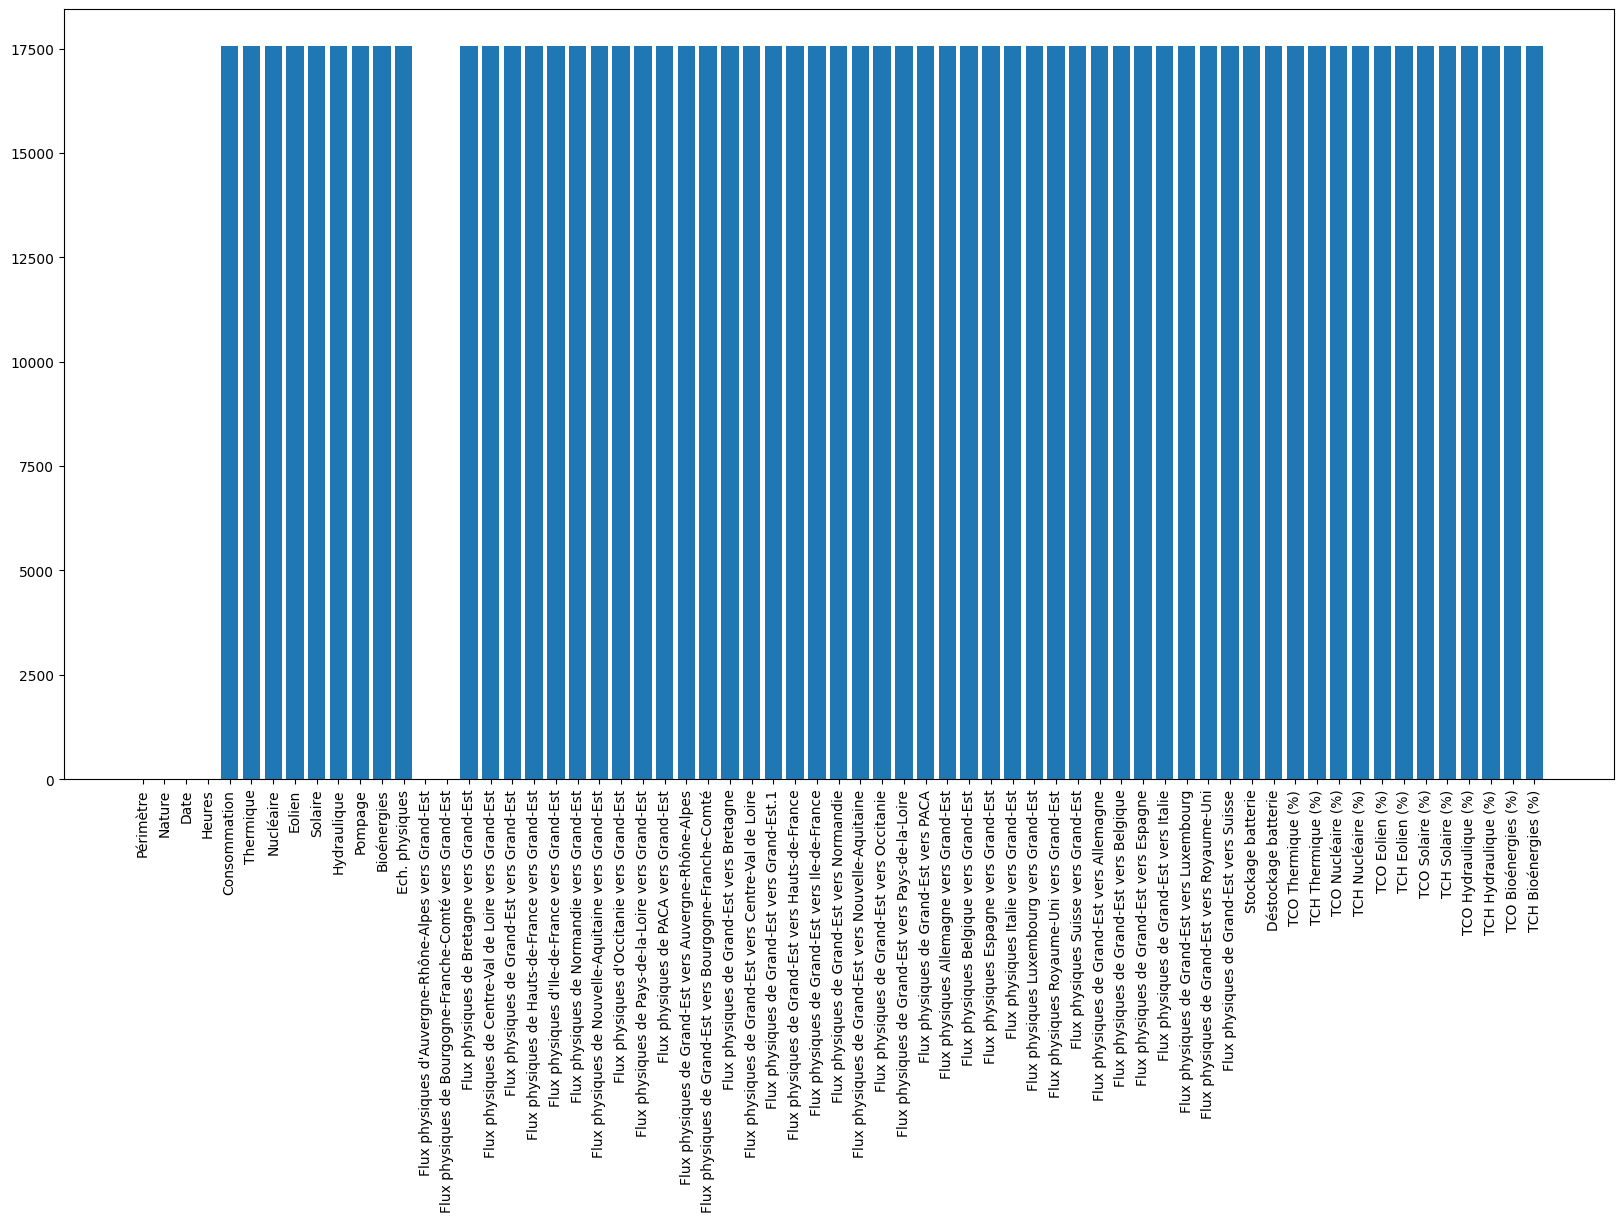

In [76]:
# display missing value on a plot

missing_values_count = productionGE_2020.isnull().sum()

plt.figure(figsize=(20,10))
plt.bar(missing_values_count.index, missing_values_count.values)
plt.xticks(rotation=90)
plt.show()

As we can see, one row over 2 is empty because data is measured every 30 minutes. We can drop the corresponding rows.


In [77]:
productionGE_2020.dropna(inplace=True)
productionGE_2020

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,...,TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,Grand-Est,Données définitives,2020-01-01,00:00:00,5703.0,1503.0,11978.0,1145.0,0.0,1104.0,...,210.03,95.21,20.08,31.69,0.0,0.0,19.36,20.59,2.14,41.22
2,Grand-Est,Données définitives,2020-01-01,00:30:00,5620.0,1509.0,12092.0,1045.0,0.0,953.0,...,215.16,96.12,18.59,28.92,0.0,0.0,16.96,17.77,2.14,40.54
4,Grand-Est,Données définitives,2020-01-01,01:00:00,5471.0,1380.0,11947.0,846.0,0.0,942.0,...,218.37,94.97,15.46,23.42,0.0,0.0,17.22,17.57,2.23,41.22
6,Grand-Est,Données définitives,2020-01-01,01:30:00,5506.0,1195.0,12160.0,823.0,0.0,944.0,...,220.85,96.66,14.95,22.78,0.0,0.0,17.14,17.61,2.18,40.54
8,Grand-Est,Données définitives,2020-01-01,02:00:00,5571.0,1010.0,12153.0,801.0,0.0,944.0,...,218.15,96.61,14.38,22.17,0.0,0.0,16.94,17.61,2.15,40.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35126,Grand-Est,Données définitives,2020-12-31,21:30:00,5399.0,1002.0,9212.0,329.0,0.0,1007.0,...,170.62,85.14,6.09,8.66,0.0,0.0,18.65,43.59,2.24,50.00
35128,Grand-Est,Données définitives,2020-12-31,22:00:00,5278.0,1005.0,9220.0,306.0,0.0,932.0,...,174.69,85.21,5.80,8.05,0.0,0.0,17.66,40.35,2.29,50.00
35130,Grand-Est,Données définitives,2020-12-31,22:30:00,5326.0,996.0,9218.0,291.0,0.0,923.0,...,173.08,85.19,5.46,7.66,0.0,0.0,17.33,39.96,2.29,50.41
35132,Grand-Est,Données définitives,2020-12-31,23:00:00,5357.0,1014.0,9221.0,267.0,0.0,1088.0,...,172.13,85.22,4.98,7.03,0.0,0.0,20.31,47.10,2.31,51.24


In [78]:
missing_values_count = productionGE_2020.isnull().sum()

print(missing_values_count) 

Périmètre              0
Nature                 0
Date                   0
Heures                 0
Consommation           0
                      ..
TCH Solaire (%)        0
TCO Hydraulique (%)    0
TCH Hydraulique (%)    0
TCO Bioénergies (%)    0
TCH Bioénergies (%)    0
Length: 65, dtype: int64


In [79]:
# group by date and mean of production

productionGE_2020 = productionGE_2020[['Date', 'Consommation', 'Thermique',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies']].groupby('Date').mean()

In [80]:
productionGE_2020.head()

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
Date,,,,,,,,
2020-01-01,5415.604167,963.562500,12030.937500,373.270833,10.500000,986.895833,-159.291667,119.916667
2020-01-02,5896.416667,1651.708333,11990.520833,770.833333,12.750000,991.666667,-107.791667,121.270833
2020-01-03,5795.541667,1251.000000,10793.229167,2020.750000,8.625000,898.083333,-116.541667,123.104167
2020-01-04,5479.083333,1079.333333,11697.937500,547.520833,29.750000,848.083333,-132.708333,124.083333
2020-01-05,5355.791667,1662.229167,11664.583333,75.354167,34.916667,869.687500,-75.270833,123.666667


**add weather**


In [81]:
weatherGE_2020 = pd.read_csv('data/meteo-france-2020.csv', sep=';', encoding_errors='ignore')
weatherGE_2020.head()

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
0,1089001,AMBERIEU,"519'45""E","4558'35""N",250,20200101,"0,0",v,"-2,2",v,...,97.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
1,1089001,AMBERIEU,"519'45""E","4558'35""N",250,20200102,"0,0",v,"-1,8",v,...,69.0,v,99.0,v,0.0,t,860.0,t,86.0,v
2,1089001,AMBERIEU,"519'45""E","4558'35""N",250,20200103,"0,4",v,"3,3",v,...,71.0,v,95.0,v,0.0,t,620.0,t,81.0,v
3,1089001,AMBERIEU,"519'45""E","4558'35""N",250,20200104,"0,6",v,"3,4",v,...,74.0,v,97.0,v,0.0,t,1168.0,t,89.0,v
4,1089001,AMBERIEU,"519'45""E","4558'35""N",250,20200105,"0,0",v,"-3,4",v,...,77.0,v,97.0,v,0.0,t,1395.0,t,92.0,v


In [82]:
# filter to keep only the Nancy-Ochey station

weatherGE_2020 = weatherGE_2020[weatherGE_2020['NOM'] == 'NANCY-OCHEY']
weatherGE_2020.head()

,POSTE,NOM,LON,LAT,ALT,DATE,RR,QRR,TN,QTN,...,UN,QUN,UX,QUX,DHUMI40,QDHUMI40,DHUMI80,QDHUMI80,UM,QUM
30528,54405001,NANCY-OCHEY,"557'35""E","4834'51""N",336,20200101,"0,0",v,"-4,3",v,...,89.0,v,98.0,v,0.0,t,1440.0,t,97.0,v
30529,54405001,NANCY-OCHEY,"557'35""E","4834'51""N",336,20200102,"0,0",v,"-2,0",v,...,91.0,v,98.0,v,0.0,t,1440.0,t,95.0,v
30530,54405001,NANCY-OCHEY,"557'35""E","4834'51""N",336,20200103,"3,4",v,"3,2",v,...,81.0,v,97.0,v,0.0,t,1440.0,t,91.0,v
30531,54405001,NANCY-OCHEY,"557'35""E","4834'51""N",336,20200104,"0,0",v,"1,6",v,...,75.0,v,97.0,v,0.0,t,1280.0,t,90.0,v
30532,54405001,NANCY-OCHEY,"557'35""E","4834'51""N",336,20200105,"0,0",v,"0,3",v,...,64.0,v,98.0,v,0.0,t,1225.0,t,90.0,v


In [83]:
# select the columns we need: date, mean temperature(TM), wind speed(FFM), humidity(UM), rain (RR)

weatherGE_2020 = weatherGE_2020[['DATE', 'TM', 'FFM', 'UM', 'RR']]
weatherGE_2020.head()

,DATE,TM,FFM,UM,RR
30528,20200101,"-1,4","1,9",97.0,"0,0"
30529,20200102,"2,0","3,6",95.0,"0,0"
30530,20200103,"6,3","6,4",91.0,"3,4"
30531,20200104,"3,8","3,1",90.0,"0,0"
30532,20200105,"2,9","1,4",90.0,"0,0"


In [84]:
# we get the date from 01/01/2020 to 31/12/2020, date format example: 20200101

weatherGE_2020 = weatherGE_2020[(weatherGE_2020['DATE'] >= 20200101) & (weatherGE_2020['DATE'] <= 20201231)]
weatherGE_2020.head()

,DATE,TM,FFM,UM,RR
30528,20200101,"-1,4","1,9",97.0,"0,0"
30529,20200102,"2,0","3,6",95.0,"0,0"
30530,20200103,"6,3","6,4",91.0,"3,4"
30531,20200104,"3,8","3,1",90.0,"0,0"
30532,20200105,"2,9","1,4",90.0,"0,0"


In [85]:
weatherGE_2020.shape

(366, 5)

**merge productionGE_2020 with weatherGE_2020**


In [86]:
# merge productionGE_2020 with weatherGE_2020 on date

productionGE_2020 = productionGE_2020.reset_index()
weatherGE_2020 = weatherGE_2020.reset_index()


# convert from 2020-01-01 to 20200101
productionGE_2020['Date'] = productionGE_2020['Date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
weatherGE_2020['DATE'] = weatherGE_2020['DATE'].astype(int)

productionGE_2020 = productionGE_2020.rename(columns={'Date': 'DATE'})




In [87]:
productionGE_2020.head()


,DATE,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
0,20200101,5415.604167,963.562500,12030.937500,373.270833,10.500000,986.895833,-159.291667,119.916667
1,20200102,5896.416667,1651.708333,11990.520833,770.833333,12.750000,991.666667,-107.791667,121.270833
2,20200103,5795.541667,1251.000000,10793.229167,2020.750000,8.625000,898.083333,-116.541667,123.104167
3,20200104,5479.083333,1079.333333,11697.937500,547.520833,29.750000,848.083333,-132.708333,124.083333
4,20200105,5355.791667,1662.229167,11664.583333,75.354167,34.916667,869.687500,-75.270833,123.666667


In [88]:
# convert TM, FFM, UM, RR to float

weatherGE_2020['TM'] = weatherGE_2020['TM'].apply(lambda x: x.replace(',', '.')).astype(float)
weatherGE_2020['FFM'] = weatherGE_2020['FFM'].apply(lambda x: x.replace(',', '.')).astype(float)
# weatherGE_2020['UM'] = weatherGE_2020['UM'].apply(lambda x: x.replace(',', '.')).astype(float)
weatherGE_2020['RR'] = weatherGE_2020['RR'].apply(lambda x: x.replace(',', '.')).astype(float)

weatherGE_2020.head()

,index,DATE,TM,FFM,UM,RR
0,30528,20200101,-1.4,1.9,97.0,0.0
1,30529,20200102,2.0,3.6,95.0,0.0
2,30530,20200103,6.3,6.4,91.0,3.4
3,30531,20200104,3.8,3.1,90.0,0.0
4,30532,20200105,2.9,1.4,90.0,0.0


In [89]:
productionGE_weather_2020 = productionGE_2020.merge(weatherGE_2020, on='DATE')

In [90]:
productionGE_weather_2020.head()

,DATE,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,index,TM,FFM,UM,RR
0,20200101,5415.604167,963.562500,12030.937500,373.270833,10.500000,986.895833,-159.291667,119.916667,30528,-1.4,1.9,97.0,0.0
1,20200102,5896.416667,1651.708333,11990.520833,770.833333,12.750000,991.666667,-107.791667,121.270833,30529,2.0,3.6,95.0,0.0
2,20200103,5795.541667,1251.000000,10793.229167,2020.750000,8.625000,898.083333,-116.541667,123.104167,30530,6.3,6.4,91.0,3.4
3,20200104,5479.083333,1079.333333,11697.937500,547.520833,29.750000,848.083333,-132.708333,124.083333,30531,3.8,3.1,90.0,0.0
4,20200105,5355.791667,1662.229167,11664.583333,75.354167,34.916667,869.687500,-75.270833,123.666667,30532,2.9,1.4,90.0,0.0


**save the dataset**


In [91]:
# save the dataset

productionGE_weather_2020.to_csv('data/productionGE_weather_2020.csv', index=False)